# Preparing stuff

In [25]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from collections import OrderedDict
import ast
import Bio.PDB
%matplotlib inline
%run 'functions_dump.py'
notebook_prefix = 'ks01_'

### Orienting myself

In [173]:
karen_folder = os.getcwd()
analysis_folder = os.path.dirname(os.getcwd())
root_folder = os.path.dirname(analysis_folder)
data_folder = os.path.join(root_folder, 'Data')
figures_folder = os.path.join(karen_folder, 'figures')
small_tables_folder = os.path.join(root_folder, 'Data_Small_Tables')
files_dump_folder = os.path.join(karen_folder, 'files_dump')
structure_predictions_folder = os.path.join(files_dump_folder, 'structure_predictions')

### Reading the data

In [27]:
data_all = OrderedDict()
files = [f for f in os.listdir(data_folder) if '.csv' in f]
for f in sorted(files, key = lambda s: int(s.split('_')[0][1:])):
    data_all[f[:-9]] = pd.read_table(os.path.join(data_folder, f))

In [124]:
positions = pd.read_table(os.path.join(small_tables_folder, 'positions.csv'))
positions = positions.set_index('Unnamed: 0').transpose().reset_index().rename(columns={'index' : 'segment'}).reset_index(drop=True, )
positions

Unnamed: 0,segment,wt1,positions,len1,len2,start1,end1,wt2,start2,end2
0,S1,EALGAVRGVK,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ...",10,10,140,149,EALSRAVVDL,160,169
1,S2,SNRPYAVVE,"[170, 171, 172, 173, 174, 175, 176, 177, 178, ...",9,9,170,178,LSCEMIPHF,189,197
2,S3,LGLQREKVGD,"[179, 180, 181, 182, 183, 184, 185, 186, 187, ...",10,7,179,188,LESFAEA,198,204
3,S4,SRITLHVDCL,"[205, 206, 207, 208, 209, 210, 211, 212, 213, ...",10,10,205,214,SAFKALAVAI,225,234
4,S5,RGKNDHHRSE,"[215, 216, 217, 218, 219, 220, 221, 222, 223, ...",10,11,215,224,REATSPNGTND,235,251
5,S6,CGIALGQAFK,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",10,10,130,139,RFGSGFAPLD,150,159
6,S7,IHALAKHSGW,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",10,10,100,109,HIDDHHTTED,120,129
7,S8,HTGIGFLDHM,"[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, ...",10,10,90,99,SLIVECIGDL,110,119
8,S9,PEKEAE,"[66, 67, 68, 73, 74, 75, 82, 83, 84, 85, 86, 8...",6,8,66,75,TQSQVINV,82,89
9,S10,IEHSIF,"[41, 42, 43, 44, 64, 65, 76, 77, 78, 79, 80, 81]",6,6,41,65,AVAEQA,76,81


(0, 251)

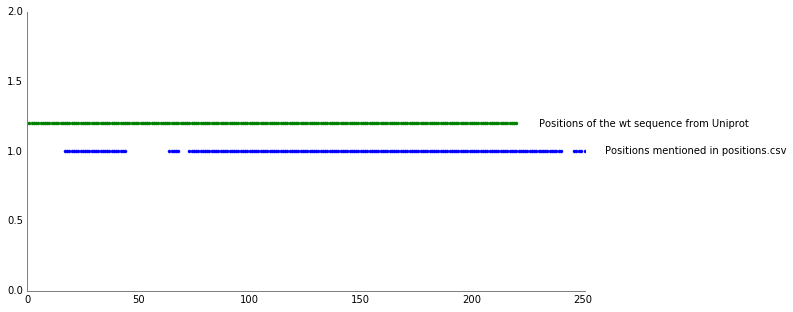

In [209]:
wt_seq_Uniprot = open(os.path.join(files_dump_folder, 'HIS3_saccharomyces_cerevisiae_from_Uniprot_P06633.txt')).read()

ps = np.array([ast.literal_eval(e) for e in positions.positions.values.flatten()])
ps = [item for sublist in ps for item in sublist]
plot_better(grid='')

plt.plot(ps, [1 for e in ps], '.')
plt.text(260, 0.98, 'Positions mentioned in positions.csv')

plt.plot(range(len(wt_seq_Uniprot)), [1.2 for e in range(len(wt_seq_Uniprot))], '.')
plt.text(230, 1.18, 'Positions of the wt sequence from Uniprot')

plt.ylim(0,2)
plt.yticks()
plt.xlim(0, max([max(ps), len(wt_seq_Uniprot)]))

### Keeping only the mutants carrying substitutions (no indels, no mutations in the unmutated "central region")

In [30]:
data = OrderedDict()
for k,v in data_all.items():
    data[k] = v[(v.middle == 1) & (v.nogap == 1)]

## Simple graphs about the library structure

In [156]:
bar_color = '#6e6e83'

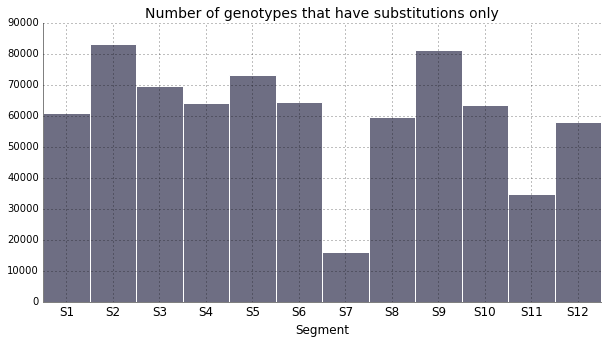

In [31]:
title = 'Number of genotypes that have substitutions only'

to_plot = [(segment_name.split('_')[0], len(segment)) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.savefig(os.path.join(figures_folder, notebook_prefix+'img01_' + '_'.join(title.split())))

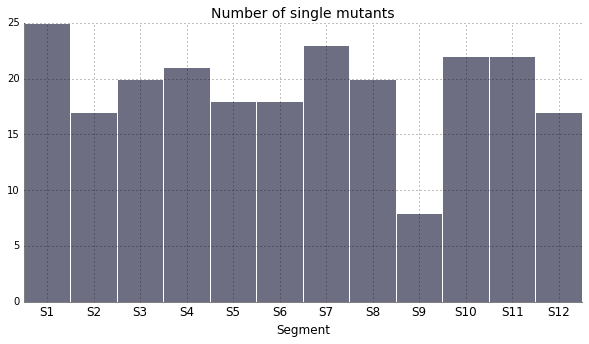

In [32]:
title = 'Number of single mutants'

to_plot = [(segment_name.split('_')[0], len(segment[segment.mut_list.str.count(':') == 0])) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.savefig(os.path.join(figures_folder, notebook_prefix+'img02_' + '_'.join(title.split())))

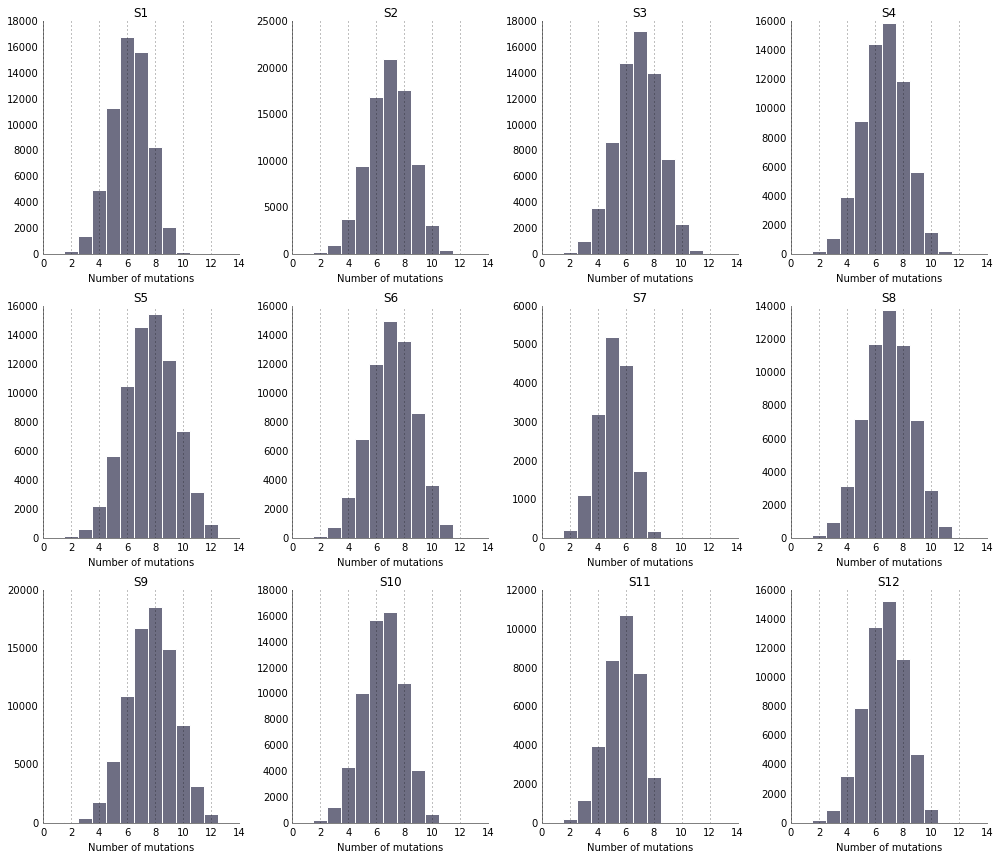

In [46]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1
    plt.bar(np.arange(len(mutant_distribution))+width/2., mutant_distribution, width, edgecolor='white', color=bar_color)
    improve_plot(ax, grid='x')
    plt.xlabel('Number of mutations')
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, notebook_prefix+'img03_' + '_'.join(title.split())))

## Fitness overview

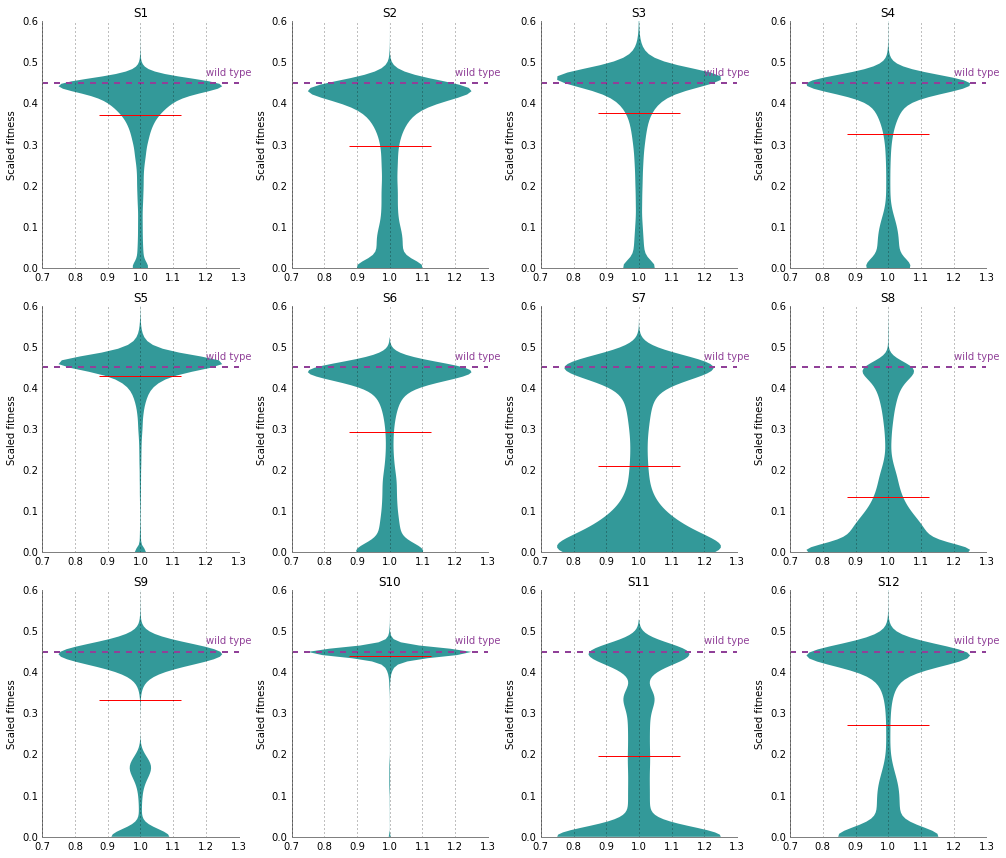

In [73]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
facecolor = '#008080'
edgecolor = 'none'
wt_color = '#904098'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1

    vplot = plt.violinplot(segment.s.values, showmeans=True, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0.45, ls='--', color=wt_color, lw=2)
    plt.text(1.2, 0.47, 'wild type', color=wt_color, fontsize=10)
    improve_plot(ax, grid='x')
    plt.ylabel('Scaled fitness')
    plt.ylim(0,0.6)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, notebook_prefix+'img04_' + '_'.join(title.split())))

# Structure

In [143]:
def calc_residue_dist(residue_one, residue_two):
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return np.sqrt(np.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two):
    """Returns a matrix of C-alpha distances between two chains"""
    answer = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

def calc_dist_matrix_for_subsets(chain_one, chain_two, chain_one_subset, chain_two_subset):
    dist_matrix = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two):
            if row < chain_one_subset[1] and row > chain_one_subset[0]:
                if col < chain_two_subset[1] and col > chain_two_subset[0]:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

def calc_dist_matrix_for_subsets(chain, subset_one, subset_two):
    dist_matrix = np.zeros((len(chain), len(chain)), np.float)
    for row, residue_one in enumerate(chain):
        for col, residue_two in enumerate(chain):
            if row in subset_one and col in subset_two:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

### Parsing a PDB file

In [255]:
pdb_code = "model_01"
pdb_file = "files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb" #not the full cage!
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_file)
model = structure[0]

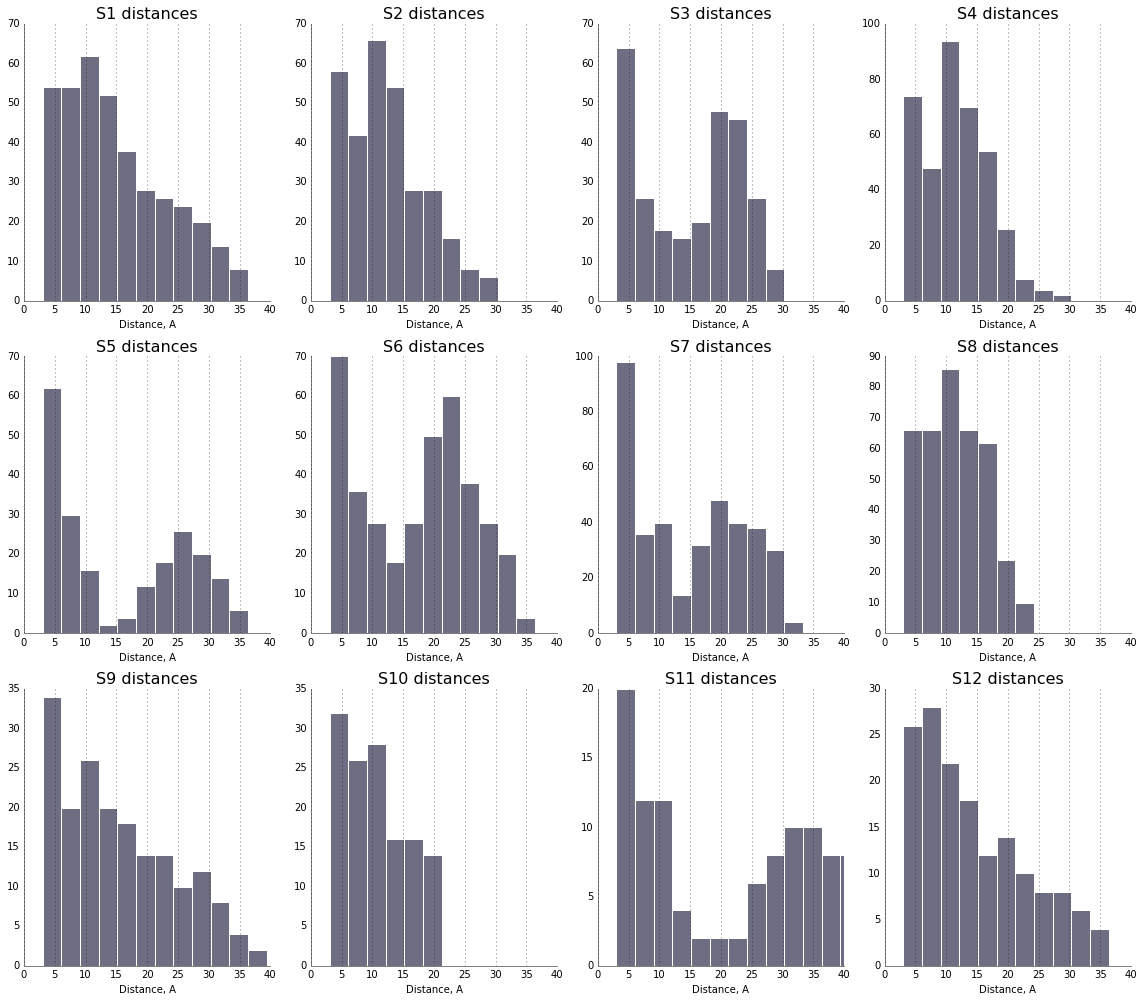

In [253]:
plot_better(width=16, height=14)
title = 'Distribution of distances\nbetween all pairs of mutated residues within a segment'

for index, segment_name in enumerate(segment_names):
#     segment_positions = positions[positions.segment == segment_name].positions.values[0]
#     segment_positions = ast.literal_eval(segment_positions)
    segment_seq = [positions[positions.segment == segment_name].wt1.values[0], positions[positions.segment == segment_name].wt2.values[0]]
    try:
        start1 = wt_seq_Uniprot.index(segment_seq[0])
        len1 = len(segment_seq[0])
        start2 = wt_seq_Uniprot.index(segment_seq[1])
        len2 = len(segment_seq[1])
        segment_positions = range(start1, start1 + len1) + range(start2, start2 + len2)
    except ValueError:
        print 'Shit happened with segment %s!\n(sequence is %s)' %(segment_name, segment_seq)
        continue
    distances = calc_dist_matrix_for_subsets(model["A"], segment_positions, segment_positions).flatten()
    distances = [e for e in distances if e > 0]
    
    ax = plt.subplot(len(segment_names)/4, 4, index+1)
    plt.title(segment_name + ' distances', fontsize=16)
    plt.hist(distances, edgecolor='white', color=bar_color, range=(0,100), bins=33)
    plt.xlim(0,40)
    plt.xlabel('Distance, A')
    improve_plot(ax, grid='x')
# plt.suptitle(title, fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(figures_folder, notebook_prefix+'img05_' + '_'.join(title.split())))

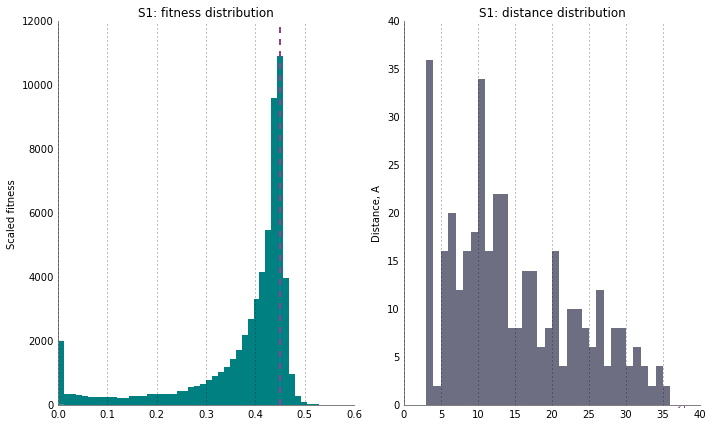

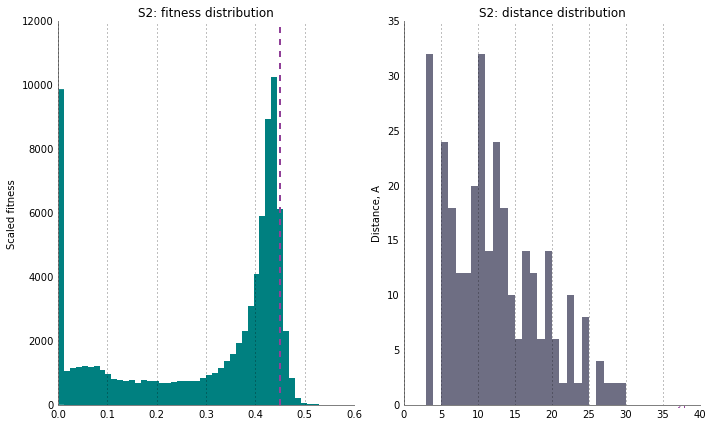

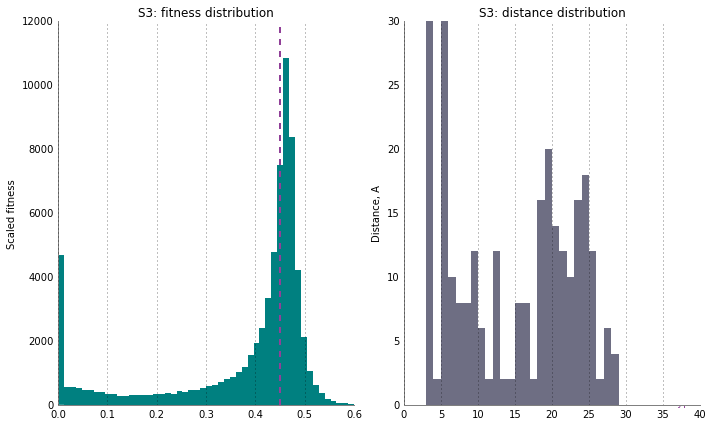

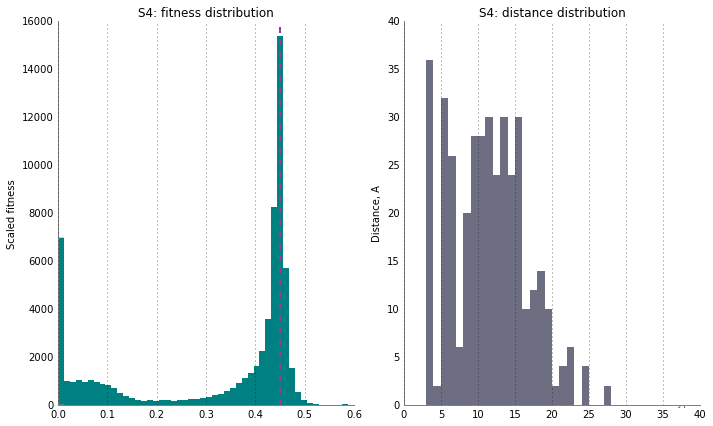

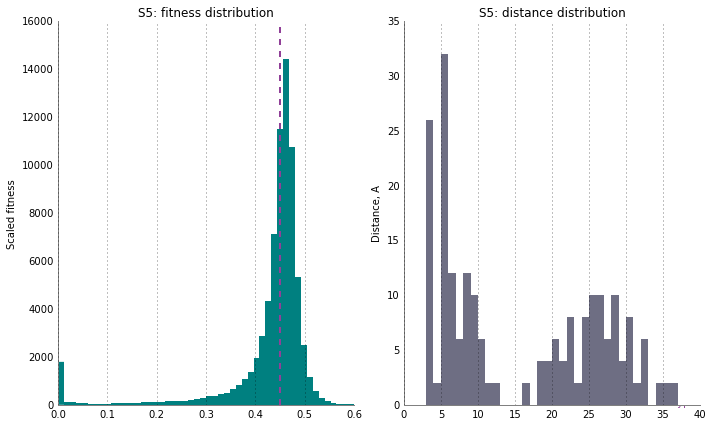

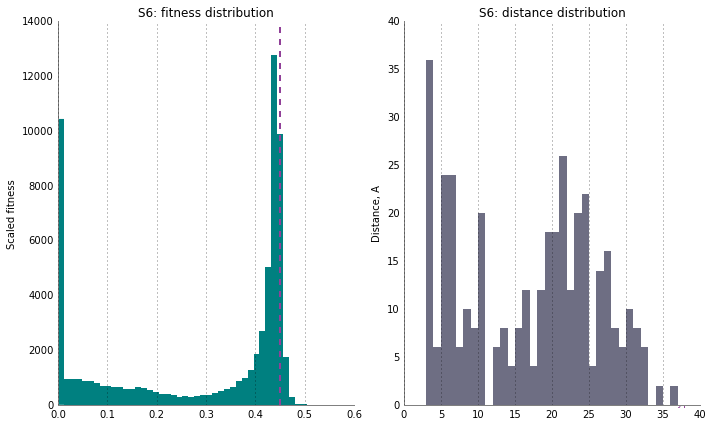

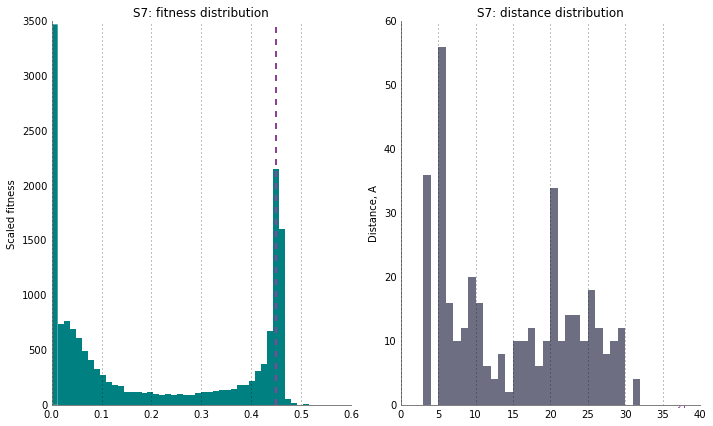

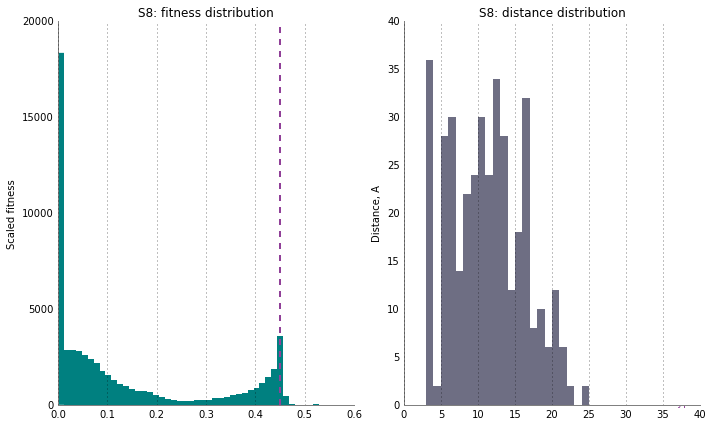

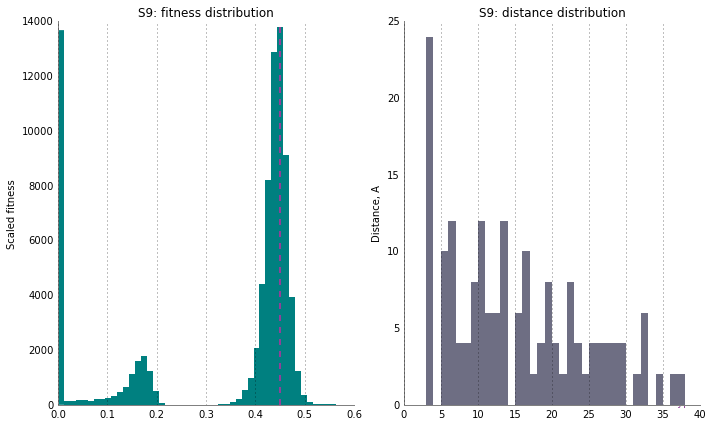

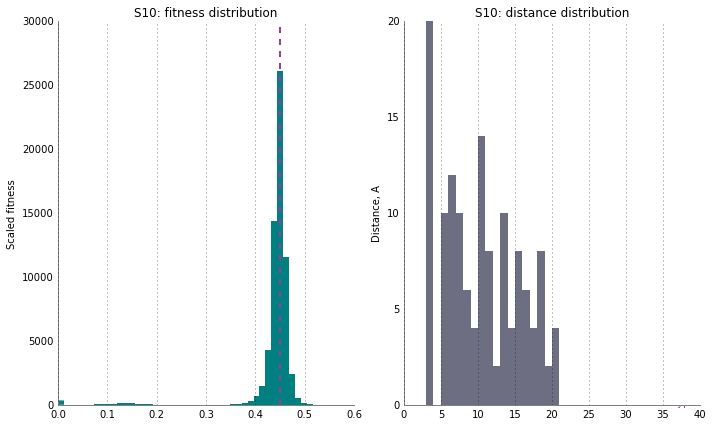

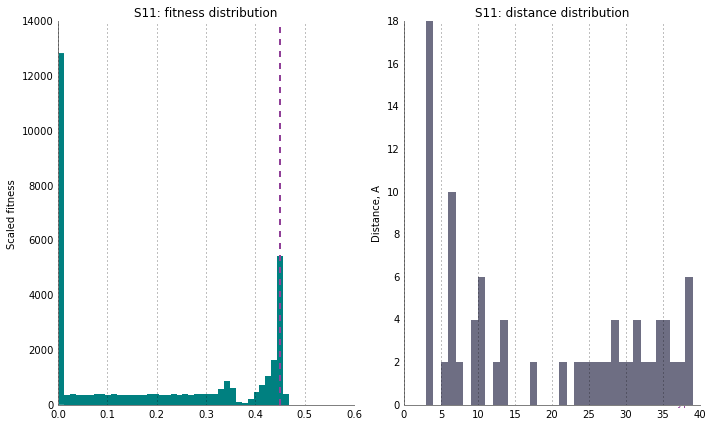

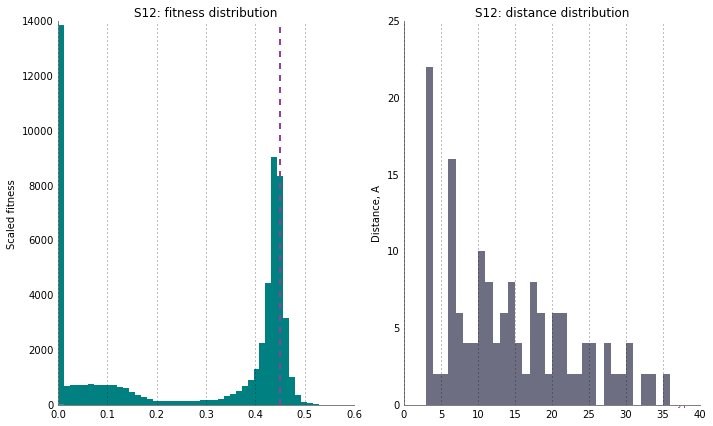

In [273]:
for index, item in enumerate(data.items()):
    
    plot_better(width=10, height=6)
    
    segment_name, segment = item
    segment_name = segment_name.split('_')[0]
    ax = plt.subplot(121)
    plt.title('%s: fitness distribution' %segment_name)
    plt.hist(segment.s.values, range=(0,0.6), bins=50, edgecolor='none', color=facecolor)
    plt.axvline(0.45, ls='--', color=wt_color, lw=2)
    plt.text(1.2, 0.47, 'wild type', color=wt_color, fontsize=10)
    plt.ylabel('Scaled fitness')
    improve_plot(ax, grid='x')

    ax = plt.subplot(122)
    plt.title('%s: distance distribution' %segment_name)
    segment_seq = [positions[positions.segment == segment_name].wt1.values[0], positions[positions.segment == segment_name].wt2.values[0]]
    try:
        start1 = wt_seq_Uniprot.index(segment_seq[0])
        len1 = len(segment_seq[0])
        start2 = wt_seq_Uniprot.index(segment_seq[1])
        len2 = len(segment_seq[1])
        segment_positions = range(start1, start1 + len1) + range(start2, start2 + len2)
    except ValueError:
        print 'Shit happened with segment %s!\n(sequence is %s)' %(segment_name, segment_seq)
        continue
    distances = calc_dist_matrix_for_subsets(model["A"], segment_positions, segment_positions).flatten()
    max_distance = 40.
    distances = np.array([e for e in distances if e > 0])
    plt.hist(distances, range=(0,40), bins=40, edgecolor='none', color=bar_color)    
    plt.ylabel('Distance, A')
    improve_plot(ax, grid='x')
    plt.tight_layout()
#     plt.savefig(os.path.join(figures_folder, notebook_prefix+'img05_' + '_'.join(title.split())))

In [89]:
# dist_matrix = calc_dist_matrix(model["A"], model["A"])
dist_matrix = calc_dist_matrix_for_subsets(model["A"], model["A"], (20,30), (100,140))
contact_map = dist_matrix < 12.0

In [90]:
print "Minimum distance", np.min(dist_matrix)
print "Maximum distance", np.max(dist_matrix)

Minimum distance 0.0
Maximum distance 41.6120834351


In [98]:
segment_names = [s.split('_')[0] for s in data.keys()]

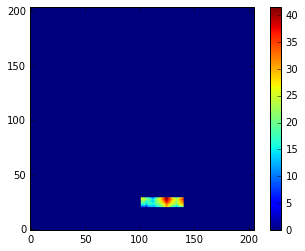

In [94]:
# for segment1 in segment_names:
#     positions[positions.segment == 'S1'].positions.values[0]
#     for segment2 in segment_names:
plt.imshow(dist_matrix, origin='lower')
plt.colorbar()
plt.xlabel('2')

In [92]:
from Bio.PDB.ResidueDepth import *
# requires msms tool to be installed 
# alias msms="/Users/karen/ipynbs/20_Vika's_His3_landscape/HIS3InterspeciesEpistasis/Analysis/Karen/msms_MacOSX_2.6.1/msms.MacOSX.2.6.1"

### Surface

In [ ]:
# http://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ

model = structure[0]
hse = HSExposure()
# Calculate HSEalpha
exp_ca = hse.calc_hs_exposure(model, option='CA3')
# Calculate HSEbeta
exp_cb = hse.calc_hs_exposure(model, option='CB')
# Calculate classical coordination number
exp_fs = hse.calc_fs_exposure(model)
# Print HSEalpha for a residue
print exp_ca[some_residue]